### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad de los alumnos (y) de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_style('whitegrid')

In [11]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82), ("Pablo Eduardo", 28, 1.81), ("Javier Araiz", 30, 1.80)]

In [12]:
altura = []
for elem in lista_alumnos:
    altura.append(elem[2])
X = altura
X = np.array(X).reshape(-1,1)

In [13]:
edad = []
for elem in lista_alumnos:
    edad.append(elem[1])
y = edad
y = np.array(y).reshape(-1,1)

In [14]:
# Dibujar con una línea la relación que hay entre la altura (X) y la edad de los alumnos (y) de la clase

In [15]:
# separamos los datos en train y test. Entrenamos el modelo solo con el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

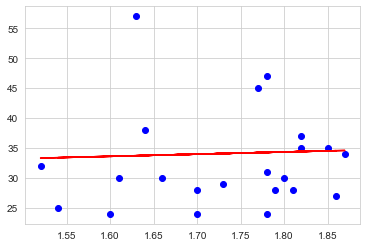

In [16]:
new_model2 = LinearRegression(n_jobs=-1)   
new_model2.fit(X_train, y_train)    

plt.scatter(X, y, color='b')
plt.plot(X, new_model2.predict(X), color='red') 

In [17]:
b = new_model2.coef_
b

array([[3.63847494]])

In [18]:
# ¿Es una buena técnica para este tipo de problemas? ¿Por qué?
# No, porque estamos comparando dos variables númericas que no tienen ninguna correlación

In [19]:
# ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

In [20]:
predictions = new_model2.predict(X_test)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.376388620089027
MSE: 50.719904618676026
RMSE: 7.121790829466703


In [22]:
# En este caso como no hay outliers, RMSE sería mas indicada

In [23]:
# Representa la matriz de correlación, ¿los datos están correlacionados?

In [24]:
import pandas as pd 
d = {"edad":edad, "altura":altura}
df = pd.DataFrame(data=d)

<AxesSubplot:>

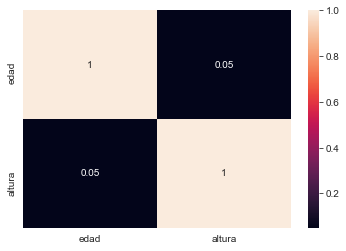

In [25]:
sns.heatmap(df.corr(), annot = True)
# los datos no están correlacionados

In [26]:
# ¿Qué ocurre si la altura se multiplica por dos? 

In [27]:
doble_altura = []
for elem in altura:
    doble_altura.append(elem*2) 

doble_altura = np.array(doble_altura).reshape(-1,1)

In [28]:
# vuelvo a dividir los datos como antes
X_train, X_test, y_train, y_test = train_test_split(doble_altura, y, test_size=0.20, random_state=43)

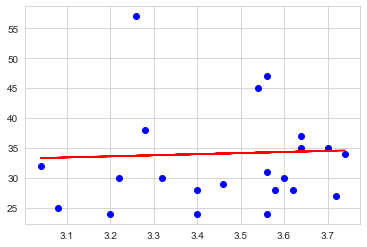

In [29]:
new_model2 = LinearRegression(n_jobs=-1)   
new_model2.fit(X_train, y_train)

plt.scatter(doble_altura, y, color='b')
plt.plot(doble_altura, new_model2.predict(doble_altura), color='red')

In [30]:
b = new_model2.coef_
b

array([[1.81923747]])

In [31]:
#¿Y si se multiplica solo la edad?

In [32]:
doble_edad = []
for elem in edad:
    doble_edad.append(elem*2)

doble_edad = np.array(doble_edad).reshape(-1,1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, doble_edad, test_size=0.20, random_state=43)

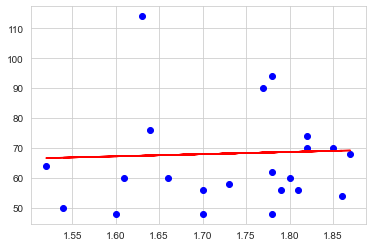

In [34]:
new_model2 = LinearRegression(n_jobs=-1)   
new_model2.fit(X_train, y_train)

plt.scatter(X, doble_edad, color='b')
plt.plot(X, new_model2.predict(X), color='red')

In [35]:
b = new_model2.coef_
b

array([[7.27694987]])

In [36]:
# con los valores originales la pendiente es 7.07, si se multiplican las alturas la pendiente se reduce casi a la mitad. 
# Si se multiplican las edades la pendiente aumenta el doble